<a href="https://colab.research.google.com/github/schmelto/machine-learning/blob/main/Deeplearning/Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss Functions

In this notebook, various loss functions are compared using the MNIST data set

In [1]:
%tensorflow_version 2.x # Command for Google Colab for Tensorflow 2

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # Command for Google Colab for Tensorflow 2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## Loading the MNIST data set

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras \
  .datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Here the MNIST data is normalized so that it is only saved as a float from 0 to 1

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Definition of the models

The models can be generated using the `get_model()` function and consist of 2 dense layers with Relu and Sigmoid functions

In [5]:
def get_model():
  return keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
  ])

model_mse = get_model() # Modell with Mean Squared Error Loss
model_cce =  get_model() # Modell with Categorical Crossentropy
model_scce = get_model() # Modell with Sparse Categorical Crossentropy

## Compile the models

For each of the models, Stochastic Gradient Descent is used as an optimizer and the loss function that fits the model.

This is set in the `model.compile()` function

In [6]:
optimizer = 'sgd'

model_mse.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['accuracy']
)
model_cce.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_scce.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Training the models

The training results are saved in the history list.

For training with the Sparse Categorical Crossentropy, the data do not have to be changed. This is why you can train here with `model.fit()`. A validation data set is determined at the same time.

The other two models are added to the models list so that they can be trained.

In [7]:
epochs=15 # Definition of 15 training periods
history = [model_scce.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    verbose=True)
]
models = [model_mse, model_cce]

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9903 - accuracy: 0.7470 - val_loss: 0.3492 - val_accuracy: 0.9069
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3476 - accuracy: 0.9024 - val_loss: 0.2860 - val_accuracy: 0.9223
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.9186 - val_loss: 0.2525 - val_accuracy: 0.9314
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.9284 - val_loss: 0.2309 - val_accuracy: 0.9357
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2316 - accuracy: 0.9366 - val_loss: 0.2131 - val_accuracy: 0.9412
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2120 - accuracy: 0.9401 - val_loss: 0.1987 - val_accuracy: 0.9437
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1958 - accuracy: 0.9450 - val_loss: 0.1862 - val_accuracy:

### Conversion of the labels into categorical labels
(more on this at the end of the notebook)

These are required for training with the other loss functions

In [8]:
_train_labels = keras.utils.to_categorical(train_labels, 10)
_test_labels = keras.utils.to_categorical(test_labels, 10)

In [9]:
# Train the other two models
history += [model.fit(train_images, _train_labels, epochs=epochs, validation_data=(test_images, _test_labels), verbose=True) for model in models]

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1398 - accuracy: 0.1778 - val_loss: 0.0845 - val_accuracy: 0.4463
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0819 - accuracy: 0.4879 - val_loss: 0.0722 - val_accuracy: 0.5981
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0698 - accuracy: 0.6171 - val_loss: 0.0614 - val_accuracy: 0.6844
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0602 - accuracy: 0.6841 - val_loss: 0.0537 - val_accuracy: 0.7159
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.7133 - val_loss: 0.0484 - val_accuracy: 0.7409
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.7362 - val_loss: 0.0446 - val_accuracy: 0.7606
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0447 - accuracy: 0.7541 - val_loss: 0.0415 - val_accuracy:

## Plot the results with matplotlib

With `plt.plot` the individual results of the models are integrated in different colors.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

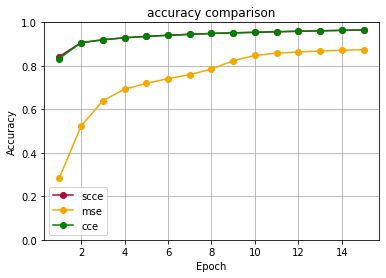

In [10]:
def plot_learning_curve(ylim=0.6):
    plt.figure()
    plt.title("accuracy comparison")
    axes = plt.gca()
    axes.set_ylim([ylim, 1])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    train_sizes = np.arange(1, 1 + len(history[0].history['accuracy']))
    plt.ylim((0,1))
    plt.grid()
    plt.plot(
        train_sizes,
        history[0].history['accuracy'],
        'o-',
        color=(177/255, 6/255, 58/255),
        label="scce"
    )
    plt.plot(
        train_sizes,
        history[1].history['accuracy'],
        'o-',
        color=(246/255, 168/255, 0),
        label="mse")
    
    plt.plot(
        train_sizes,
        history[2].history['accuracy'],
        'o-',
        color='green',
        label="cce"
    )

    plt.legend(loc="best")
    return plt

plot_learning_curve()

- scce = Sparse Categorical Crossentropy
- cce = Categorical Crossentropy
- mse = Mean Squared Error

## When should you use CategoricalCross Entropy and when should you use Sparse Categorical Crossentropy?

For `Categorical Cross Entropy` the labels must be available as an array with a 1 at the index of the associated class.


For `Sparse Categorical Cross Entropy`, the labels with the designation of the starting class must be available.

In [11]:
_test_labels = keras.utils.to_categorical(test_labels, 10)

print('Test labels categorical:')
print(_test_labels[:2])
print('Use of the categorical_crossentropy required')
print('\n')
print('Test labels non categorical:')
print(test_labels[:2])
print('Use of the sparse_categorical_crossentropy required')

Test labels categorical:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Use of the categorical_crossentropy required


Test labels non categorical:
[7 2]
Use of the sparse_categorical_crossentropy required


Conversion into categorical values:

In [12]:
_test_labels = keras.utils.to_categorical(train_labels, 10)